In [9]:
#Imports
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import folium

In [ ]:
pip install geodatasets

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import geopandas as gpd
print(gpd.__version__)

1.0.1


In [ ]:
import geodatasets

In [12]:
pip install sqlalchemy


Note: you may need to restart the kernel to use updated packages.


In [13]:
# import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import text
        

In [14]:
# import kickstarter_projects.csv 
df = pd.read_csv('../data/kickstarter_projects.csv')


In [15]:
# Step 1: Read the CSV file
csv_file_path = '../data/kickstarter_projects.csv'  # Update the path if needed
df = pd.read_csv(csv_file_path)

# Step 2: Create a SQLite database connection
db_file_path = '../data/kickstarter.db'  # Path to the SQLite database file
engine = create_engine(f'sqlite:///{db_file_path}')

# Step 3: Write the DataFrame to the database
table_name = 'kickstarter_projects'  # Name of the table in the database
df.to_sql(table_name, con=engine, if_exists='replace', index=False)

print(f"Data from {csv_file_path} has been successfully written to {db_file_path} in the table '{table_name}'.")

Data from ../data/kickstarter_projects.csv has been successfully written to ../data/kickstarter.db in the table 'kickstarter_projects'.


In [17]:
df.head(1)


ID                                               Name Category   
0  1860890148  Grace Jones Does Not Give A F$#% T-Shirt (limi...  Fashion  \

  Subcategory        Country             Launched    Deadline  Goal  Pledged   
0     Fashion  United States  2009-04-21 21:02:48  2009-05-31  1000      625  \

   Backers   State  
0       30  Failed

In [18]:
df.shape

(374853, 11)

In [19]:
# find state values
df['State'].value_counts()


State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

In [20]:
# find Country values for status 'Failed' or 'Successful'
df[df['State'].isin(['Failed', 'Successful'])]['Country'].value_counts()

Country
United States     261358
United Kingdom     29453
Canada             12370
Australia           6616
Germany             3436
France              2520
Netherlands         2411
Italy               2369
Spain               1873
Sweden              1509
Mexico              1411
New Zealand         1274
Denmark              926
Ireland              683
Switzerland          652
Norway               582
Belgium              523
Austria              485
Hong Kong            477
Singapore            454
Luxembourg            57
Japan                 23
Name: count, dtype: int64

In [21]:
# find Category values for status 'Failed' or 'Successful'
df[df['State'].isin(['Failed', 'Successful'])]['Category'].value_counts()


Category
Film & Video    56503
Music           45801
Publishing      35413
Games           28520
Technology      27046
Art             25640
Design          25363
Food            22054
Fashion         19774
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4148
Dance            3573
Name: count, dtype: int64

In [22]:
# find Category values for status 'Failed' or 'Successful'
df[df['State'].isin(['Successful'])]['Category'].value_counts()

Category
Music           24105
Film & Video    23612
Games           12518
Publishing      12300
Art             11510
Design          10549
Theater          6534
Technology       6433
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: count, dtype: int64

In [23]:
# find Category values for status 'Failed' or 'Successful'
df[df['State'].isin(['Successful'])]['Subcategory'].value_counts()

Subcategory
Product Design     7961
Tabletop Games     7866
Shorts             6673
Music              6340
Documentary        5924
                   ... 
Chiptune             27
Embroidery           19
Quilts               19
Literary Spaces      13
Taxidermy             5
Name: count, Length: 159, dtype: int64

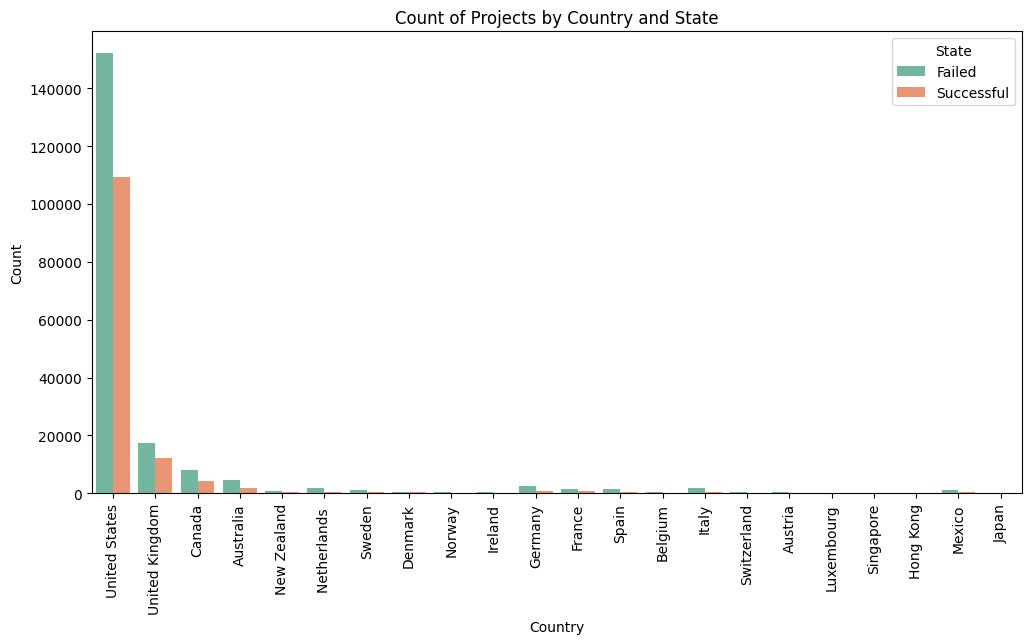

In [24]:
# plot Country values for status 'Failed' and status 'Successful'
plt.figure(figsize=(12, 6))         
sns.countplot(data=df[df['State'].isin(['Failed', 'Successful'])], x='Country', hue='State', palette='Set2')
plt.title('Count of Projects by Country and State')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='State')
plt.show()



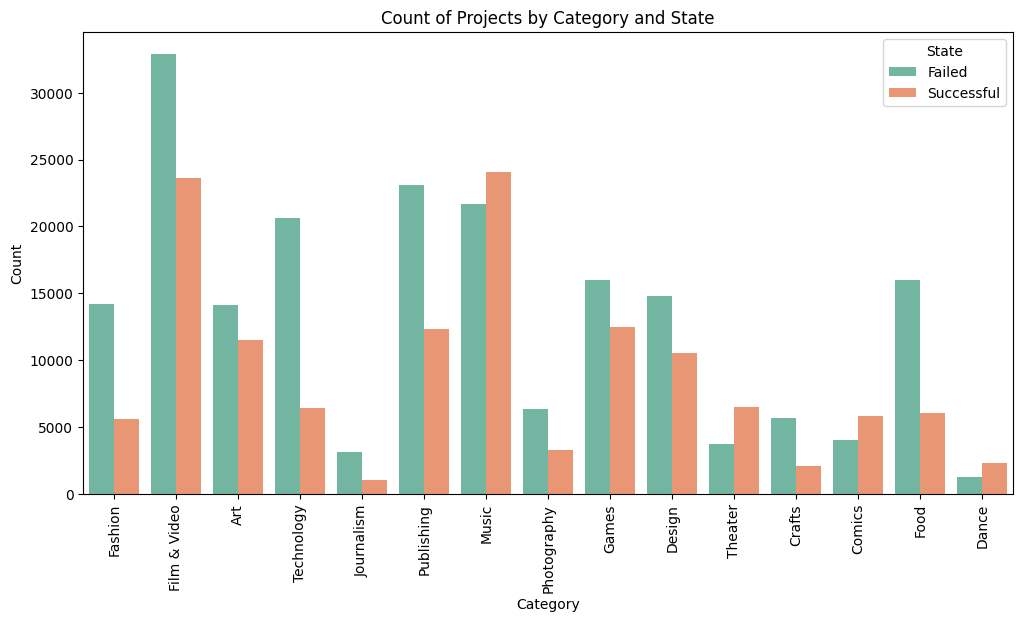

In [ ]:
# plot Category values for status 'Failed' and status 'Successful'
plt.figure(figsize=(12, 6))             
sns.countplot(data=df[df['State'].isin(['Failed', 'Successful'])], x='Category', hue='State', palette='Set2')
plt.title('Count of Projects by Category and State')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='State')
plt.show()


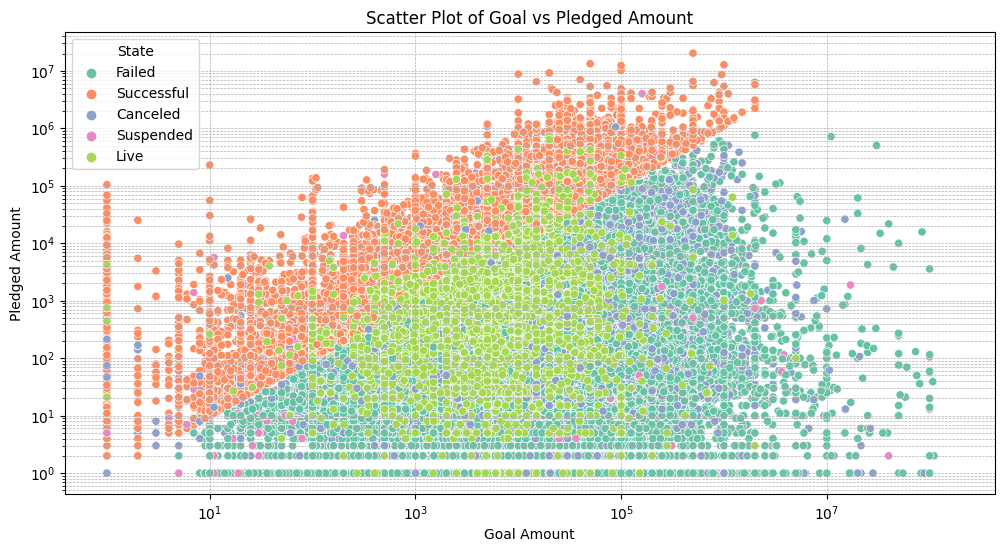

In [ ]:
# create catter plot for 'Goal' and 'Pledged' values
plt.figure(figsize=(12, 6))                     
sns.scatterplot(data=df, x='Goal', y='Pledged', hue='State', palette='Set2')
plt.title('Scatter Plot of Goal vs Pledged Amount')
plt.xlabel('Goal Amount')
plt.ylabel('Pledged Amount')
plt.legend(title='State')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


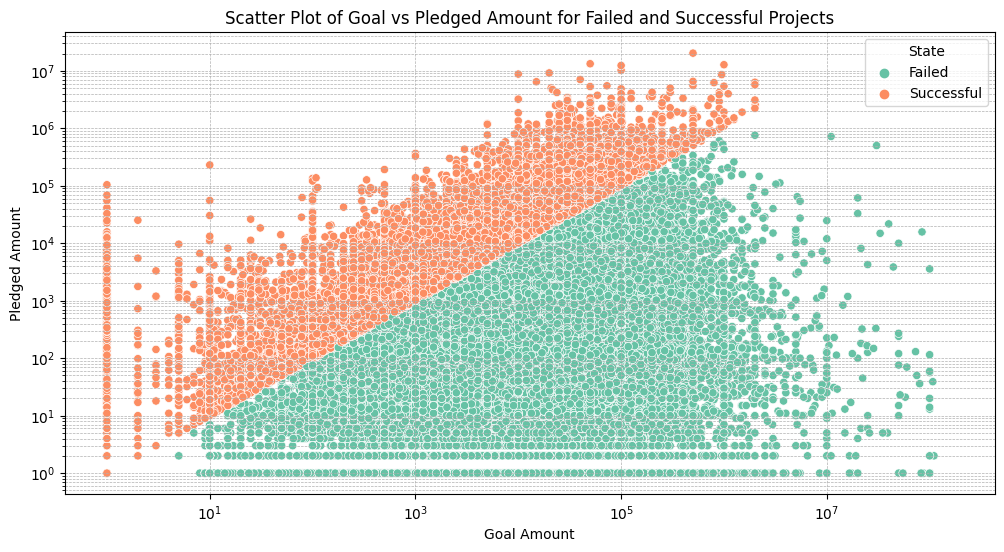

In [ ]:
# create scatter plot for 'Goal' and 'Pledged' values for 'Failed' and 'Successful' states
plt.figure(figsize=(12, 6))     
sns.scatterplot(data=df[df['State'].isin(['Failed', 'Successful'])], x='Goal', y='Pledged', hue='State', palette='Set2')
plt.title('Scatter Plot of Goal vs Pledged Amount for Failed and Successful Projects')
plt.xlabel('Goal Amount')
plt.ylabel('Pledged Amount')
plt.legend(title='State')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

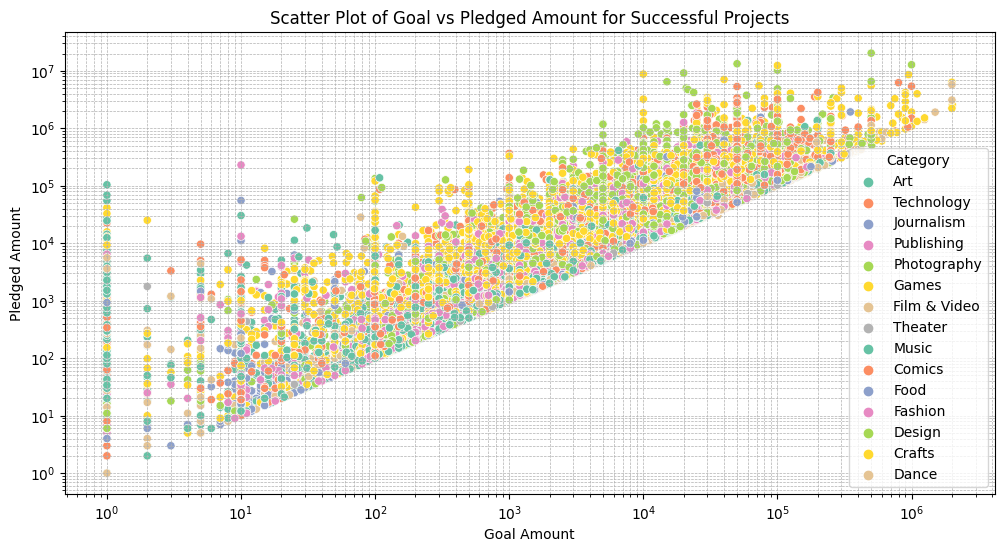

In [ ]:
# create scatter plot for 'Goal' and 'Pledged' values for'Successful' states use color to seperate catogories
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df[df['State'] == 'Successful'], x='Goal', y='Pledged', hue='Category', palette='Set2')
plt.title('Scatter Plot of Goal vs Pledged Amount for Successful Projects')
plt.xlabel('Goal Amount')
plt.ylabel('Pledged Amount')
plt.legend(title='Category')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

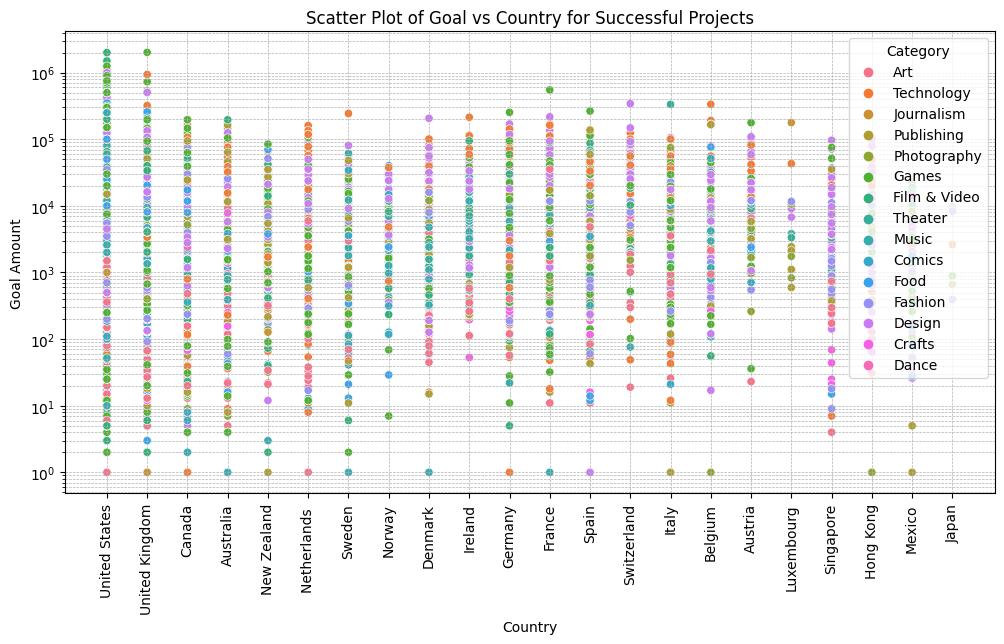

In [ ]:
# create scatter plot for 'Goal' and 'Countries' values for'Successful' states use color to seperate catogories
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df[df['State'] == 'Successful'], x='Country', y='Goal', hue='Category')
plt.title('Scatter Plot of Goal vs Country for Successful Projects')
plt.xlabel('Country')
plt.xticks(rotation=90) 
plt.ylabel('Goal Amount')
plt.legend(title='Category')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()



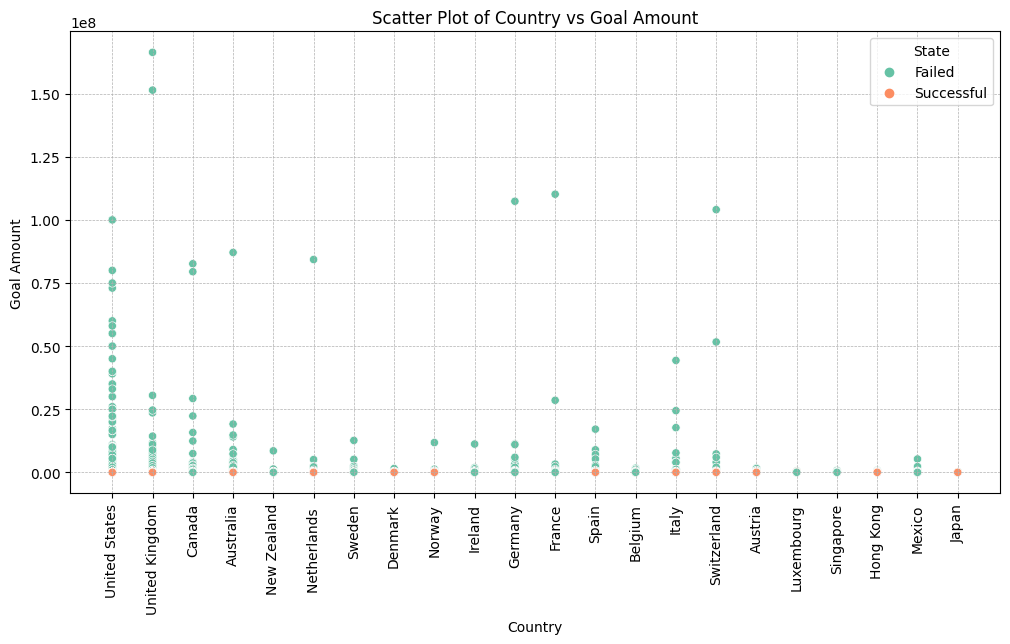

In [ ]:
# Create scatter plot for 'Country' and 'Goal Amount' values for 'Failed' and 'Successful' states
plt.figure(figsize=(12, 6))
# Filter the DataFrame for 'Failed' and 'Successful' states
df_filtered = df[df['State'].isin(['Failed', 'Successful'])]
sns.scatterplot(data=df_filtered, x='Country', y='Goal', hue='State', palette='Set2')
plt.title('Scatter Plot of Country vs Goal Amount')
plt.xlabel('Country')
plt.ylabel('Goal Amount')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='State')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

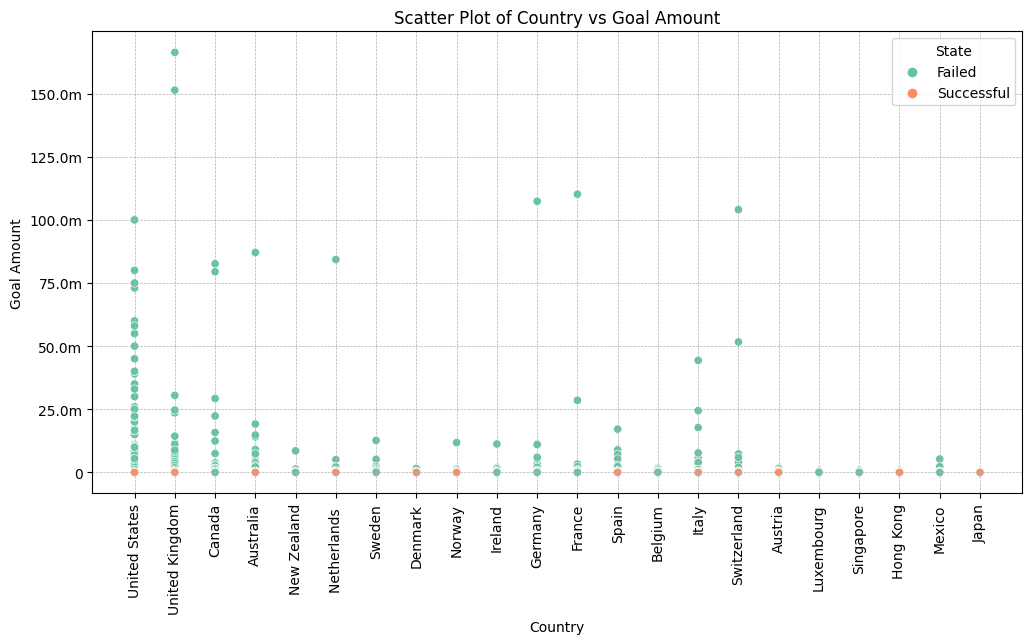

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Create scatter plot for 'Country' and 'Goal Amount' values for 'Failed' and 'Successful' states
plt.figure(figsize=(12, 6))

# Filter the DataFrame for 'Failed' and 'Successful' states
df_filtered = df[df['State'].isin(['Failed', 'Successful'])]

# Create the scatter plot
sns.scatterplot(data=df_filtered, x='Country', y='Goal', hue='State', palette='Set2')

# Add title and labels
plt.title('Scatter Plot of Country vs Goal Amount')
plt.xlabel('Country')
plt.ylabel('Goal Amount')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Format y-axis to display values like 10k, 20k, 1m, etc.
def format_y_axis(value, tick_number):
    if value >= 1_000_000:  # Format as millions
        return f'{value / 1_000_000:.1f}m'
    elif value >= 1_000:  # Format as thousands
        return f'{value / 1_000:.0f}k'
    else:  # Format as is
        return f'{value:.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend(title='State')

# Show the plot
plt.show()

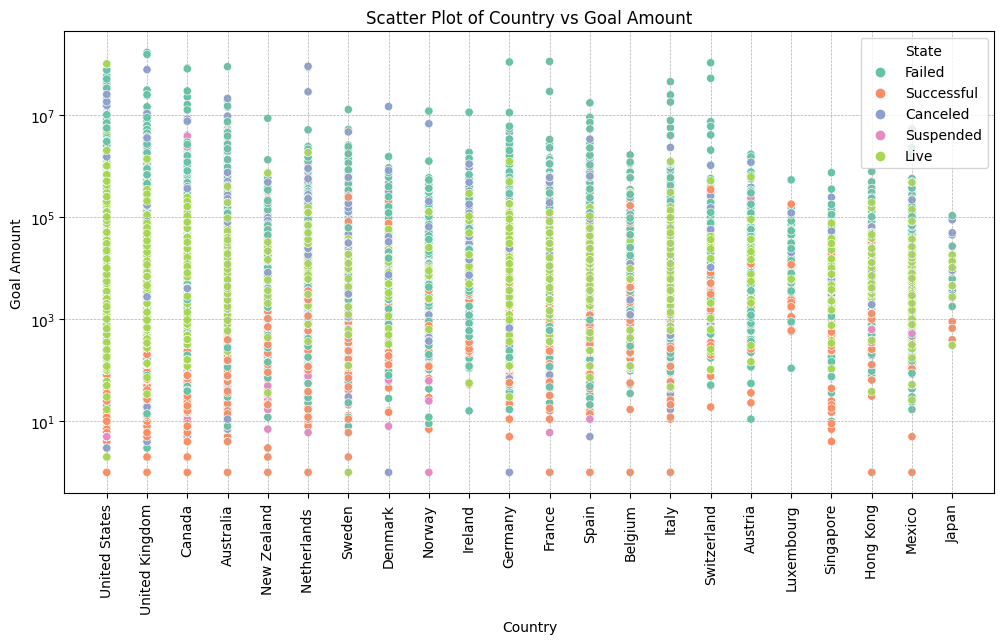

In [ ]:
# create scatter plot for 'Country' and 'Goal Amount' values
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Country', y='Goal', hue='State', palette='Set2')
plt.title('Scatter Plot of Country vs Goal Amount')
plt.xlabel('Country')
plt.ylabel('Goal Amount')
plt.xticks(rotation=90)
plt.legend(title='State')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


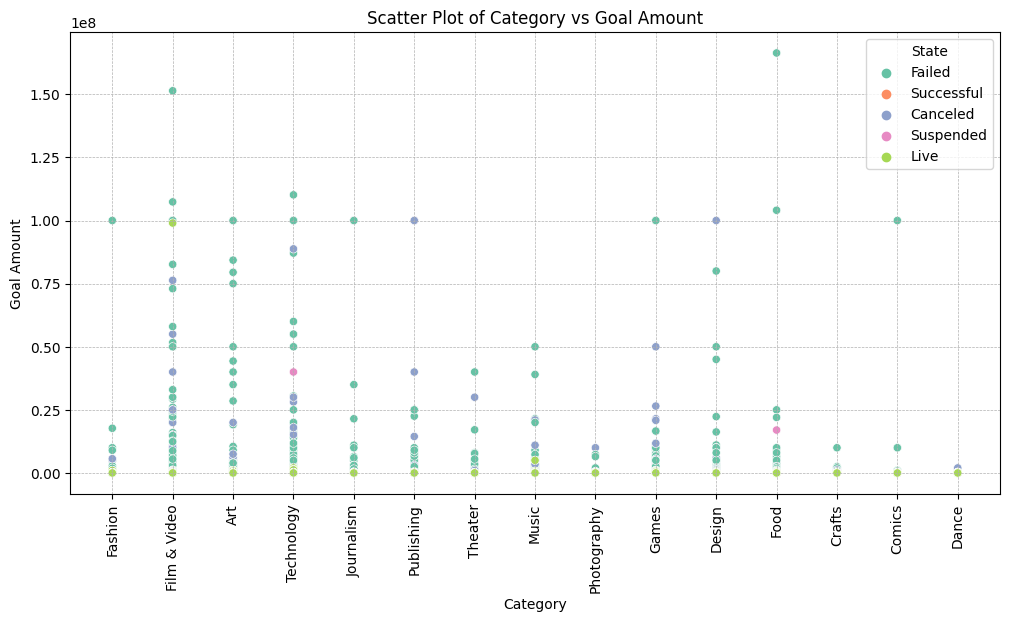

In [ ]:
# create scatter plot for 'Category' and 'Goal Amount' values
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Category', y='Goal', hue='State', palette='Set2')
plt.title('Scatter Plot of Category vs Goal Amount')
plt.xlabel('Category')
plt.ylabel('Goal Amount')
plt.xticks(rotation=90)
plt.legend(title='State')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
import plotly.express as px


In [46]:

# Filter the dataset for projects with specific conditions (e.g., successful projects with a goal below a certain threshold)
filtered_df = df[(df['State'] == 'Successful') & (df['Goal'] > 0) & (df['Pledged'] > 0)]


# Create a scatter mapbox plot
fig = px.scatter_mapbox(
    filtered_df,
    lat='lat',  # Replace with the column name for latitude
    lon='lon',  # Replace with the column name for longitude
    mapbox_style='open-street-map',
    color='Pledged',  # Replace with the column you want to use for color (e.g., 'Pledged')
    hover_data=['Category', 'Subcategory', 'Goal'],  # Replace with columns you want to display on hover
    size='Backers',  # Replace with the column you want to use for size (e.g., 'Backers')
    size_max=18
)
# Show the plot
fig.show()

ValueError: Value of 'lat' is not the name of a column in 'data_frame'. Expected one of ['Category', 'Subcategory', 'Country', 'Goal', 'Pledged', 'Backers', 'State', 'Duration', 'LaunchYear', 'LaunchMonth', 'DeadlineYear', 'DeadlineMonth'] but received: lat

#carto-positron
px.scatter_mapbox(df,
                   lat='lat',lon='long',mapbox_style='open-street-map',
                   color='price',hover_data=['sqft_living','bedrooms'],size='no_houses',size_max=18)

In [ ]:
import folium

# Step 1: Filter data for 'Failed' and 'Successful' states
filtered_data = df[df['State'].isin(['Failed', 'Successful'])]

# Step 2: Group data by Country and State
grouped_data = filtered_data.groupby(['Country', 'State']).size().unstack(fill_value=0).reset_index()
grouped_data['Total'] = grouped_data['Failed'] + grouped_data['Successful']

# Step 3: Clean the 'Country' column to remove leading/trailing spaces
grouped_data['Country'] = grouped_data['Country'].str.strip()

# Step 4: Define latitude and longitude for each country
country_coords = {
    'United States': [37.0902, -95.7129],
    'United Kingdom': [55.3781, -3.4360],
    'Canada': [56.1304, -106.3468],
    'Australia': [-25.2744, 133.7751],
    'Germany': [51.1657, 10.4515],
    'France': [46.6034, 1.8883],
    'Netherlands': [52.1326, 5.2913],
    'Italy': [41.8719, 12.5674],
    'Spain': [40.4637, -3.7492],
    'Sweden': [60.1282, 18.6435],
    'Mexico': [23.6345, -102.5528],
    'New Zealand': [-40.9006, 174.8860],
    'Denmark': [56.2639, 9.5018],
    'Ireland': [53.1424, -7.6921],
    'Switzerland': [46.8182, 8.2275],
    'Norway': [60.4720, 8.4689],
    'Belgium': [50.5039, 4.4699],
    'Austria': [47.5162, 14.5501],
    'Hong Kong': [22.3193, 114.1694],
    'Singapore': [1.3521, 103.8198],
    'Luxembourg': [49.8153, 6.1296],
    'Japan': [36.2048, 138.2529]
}

# Step 5: Map latitude and longitude to the data
# Handle missing countries gracefully
grouped_data['Latitude'] = grouped_data['Country'].map(lambda x: country_coords.get(x, [None, None])[0])
grouped_data['Longitude'] = grouped_data['Country'].map(lambda x: country_coords.get(x, [None, None])[1])

# Drop rows where latitude or longitude is missing
grouped_data = grouped_data.dropna(subset=['Latitude', 'Longitude'])

# Step 6: Create the map
m = folium.Map(location=[20, 0], zoom_start=2)

# Step 7: Add markers for each country and state
for _, row in grouped_data.iterrows():
    # Add marker for Successful projects (green)
    if row['Successful'] > 0:
        popup_text = (
            f"Country: {row['Country']}<br>"
            f"Successful: {row['Successful']}"
        )
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=row['Successful'] / 10000,  # Scale the circle size
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.6,
            popup=popup_text
        ).add_to(m)

    # Add marker for Failed projects (red)
    if row['Failed'] > 0:
        popup_text = (
            f"Country: {row['Country']}<br>"
            f"Failed: {row['Failed']}"
        )
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=row['Failed'] / 10000,  # Scale the circle size
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6,
            popup=popup_text
        ).add_to(m)

# Step 8: Display the map
m

In [ ]:
import folium

# Data for countries and their counts
data = pd.DataFrame({
    'Country': [
        'United States', 'United Kingdom', 'Canada', 'Australia', 'Germany', 'France',
        'Netherlands', 'Italy', 'Spain', 'Sweden', 'Mexico', 'New Zealand', 'Denmark',
        'Ireland', 'Switzerland', 'Norway', 'Belgium', 'Austria', 'Hong Kong', 'Singapore',
        'Luxembourg', 'Japan'
    ],
    'Count': [
        261358, 29453, 12370, 6616, 3436, 2520, 2411, 2369, 1873, 1509, 1411, 1274, 926,
        683, 652, 582, 523, 485, 477, 454, 57, 23
    ]
})

# Latitude and longitude for each country (simplified example)
country_coords = {
    'United States': [37.0902, -95.7129],
    'United Kingdom': [55.3781, -3.4360],
    'Canada': [56.1304, -106.3468],
    'Australia': [-25.2744, 133.7751],
    'Germany': [51.1657, 10.4515],
    'France': [46.6034, 1.8883],
    'Netherlands': [52.1326, 5.2913],
    'Italy': [41.8719, 12.5674],
    'Spain': [40.4637, -3.7492],
    'Sweden': [60.1282, 18.6435],
    'Mexico': [23.6345, -102.5528],
    'New Zealand': [-40.9006, 174.8860],
    'Denmark': [56.2639, 9.5018],
    'Ireland': [53.1424, -7.6921],
    'Switzerland': [46.8182, 8.2275],
    'Norway': [60.4720, 8.4689],
    'Belgium': [50.5039, 4.4699],
    'Austria': [47.5162, 14.5501],
    'Hong Kong': [22.3193, 114.1694],
    'Singapore': [1.3521, 103.8198],
    'Luxembourg': [49.8153, 6.1296],
    'Japan': [36.2048, 138.2529]
}
# Add latitude and longitude to the data
data['Latitude'] = data['Country'].map(lambda x: country_coords[x][0])
data['Longitude'] = data['Country'].map(lambda x: country_coords[x][1])

# Step 3: Create the map
m = folium.Map(location=[20, 0], zoom_start=2)

# Step 4: Add markers for each country
for _, row in data.iterrows():
    popup_text = (
        f"Country: {row['Country']}<br>"
        f"Count: {row['Count']}"
    )
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Count'] / 10000,  # Scale the circle size
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=popup_text
    ).add_to(m)
    # Display the map
m


In [ ]:
# SUCCESSFUL PROJECTS BY CATEGORY
# select only the rows where the state is 'successful'
df_winners = df[df['State'] == 'Successful']
# group by 'Category' and count the number of projects
df_groupedw = df_winners.groupby('Category').size().reset_index(name='Counts')
# sort the values in descending order
df_groupedw = df_groupedw.sort_values(by='Counts', ascending=False)
df_groupedw.head()

         

Category  Counts
10         Music   24105
6   Film & Video   23612
8          Games   12518
12    Publishing   12300
0            Art   11510

In [ ]:
# LOOSERS BY CATEGORY
# select only the rows where the state is 'Failed'
df_loosers = df[df['State'] == 'Failed']
# group by 'Category' and count the number of projects
df_groupedl = df_loosers.groupby('Category').size().reset_index(name='Counts')
# sort the values in descending order
df_groupedl = df_groupedl.sort_values(by='Counts', ascending=False)
df_groupedl.head()


Category  Counts
6   Film & Video   32891
12    Publishing   23113
10         Music   21696
13    Technology   20613
8          Games   16002

In [ ]:
# group by 'Subcategory' and count the number of projects
df_groupedsw = df_winners.groupby('Subcategory').size().reset_index(name='Counts')
# print category sub category and counts per subcategory
df_groupedsw = df_groupedsw.sort_values(by='Counts', ascending=False)
# print top 10 subcategories
df_groupedsw.head



<bound method NDFrame.head of          Subcategory  Counts
113   Product Design    7961
136   Tabletop Games    7866
129           Shorts    6673
90             Music    6340
39       Documentary    5924
..               ...     ...
150          Weaving      27
118           Quilts      19
43        Embroidery      19
83   Literary Spaces      13
137        Taxidermy       5

[159 rows x 2 columns]>

In [ ]:
# sql statement
sql = """
SELECT ID, Name, Category, Subcategory, Country, Launched, Deadline, Goal, Pledged, Backers, State 
FROM kickstarter_projects 
WHERE State = 'Successful' 
OR State = 'Failed'
ORDER BY Category, Subcategory, State 
"""
# create engine
engine = create_engine('sqlite:///../data/kickstarter.db')
# create connection
connection = engine.connect()
# execute sql statement
result = connection.execute(text(sql))
# fetch all results
results = result.fetchall()
# convert to pandas dataframe
df_sql = pd.DataFrame(results, columns=result.keys())
# close connection
connection.close()
# print top 10 rows
df_sql.head(10)


ID                                              Name Category   
0   264685346                                  commissioner.com      Art  \
1   112916020         UNINSURED LA™: Support Health Care Reform      Art   
2   345032833  Fugue State Records - Punk Rock Artist Multiples      Art   
3  1342236819                       Artist Collaborative Online      Art   
4  1487884908               Artists Meeting-Art Machine (AM-AM)      Art   
5  1779498251                                   The HuB Project      Art   
6  1952161703                              Voyage to the Arctic      Art   
7  1831326209                                    Breathing Room      Art   
8   519670089            The Animal Care for Artists Initiative      Art   
9  1076649913                                     Hello Chicago      Art   

  Subcategory        Country             Launched    Deadline   Goal  Pledged   
0         Art  United States  2009-05-10 03:03:29  2009-07-02    250        2  \
1         Art  United States  2009-05-26 23:40:46  2009-06-15   3000      370   
2         Art  United States  2009-05-30 13:35:42  2009-07-16   1000      385   
3         Art  United States  2009-07-10 04:44:51  2009-10-02   2000        0   
4         Art  United States  2009-07-20 19:40:14  2009-10-17   4000      910   
5         Art  United States  2009-07-27 20:33:31  2009-10-25   3000      335   
6         Art  United States  2009-08-25 18:25:05  2009-10-01   3000      212   
7         Art  United States  2009-08-26 01:35:48  2009-10-24   4500     2255   
8         Art  United States  2009-08-27 20:45:10  2009-10-31   5000     1735   
9         Art  United States  2009-09-14 18:25:22  2009-12-12  14000      100   

   Backers   State  
0        2  Failed  
1        8  Failed  
2        8  Failed  
3        0  Failed  
4       11  Failed  
5        9  Failed  
6        5  Failed  
7       33  Failed  
8       21  Failed  
9        2  Failed

In [ ]:
# sql 
# By Category and Subcategory
sql = """
SELECT Category, Subcategory, State, COUNT(ID) AS ProjectCount, 
       SUM(Goal) AS TotalGoal, SUM(Pledged) AS TotalPledged, 
       SUM(Backers) AS TotalBackers
FROM kickstarter_projects 
WHERE State = 'Successful' 
   OR State = 'Failed'
GROUP BY Category, Subcategory, State
ORDER BY Category, Subcategory, State
"""
# create engine
engine = create_engine('sqlite:///../data/kickstarter.db')
# create connection
connection = engine.connect()
# execute sql statement
result = connection.execute(text(sql))
# fetch all results
results = result.fetchall()
# convert to pandas dataframe
df_Category = pd.DataFrame(results, columns=result.keys())
# close connection
connection.close()
# print top 10 rows
df_Category.head(10)

Category     Subcategory       State  ProjectCount  TotalGoal  TotalPledged   
0      Art             Art      Failed          4101  348000378       2755182  \
1      Art             Art  Successful          3385   16867188      26302006   
2      Art        Ceramics      Failed           143    2437567         87760   
3      Art        Ceramics  Successful           132     942214       1338359   
4      Art  Conceptual Art      Failed           564   40560528        255899   
5      Art  Conceptual Art  Successful           366    1130179       1379934   
6      Art     Digital Art      Failed           800    9972383        233294   
7      Art     Digital Art  Successful           371    1284507       2222998   
8      Art    Illustration      Failed          1264   85506971        617922   
9      Art    Illustration  Successful          1626    4143818       9963600   

   TotalBackers  
0         39783  
1        321555  
2          1140  
3         13317  
4          4486  
5         22522  
6          4474  
7         38007  
8         13300  
9        187797

In [ ]:
df_Category['TotalProjects'] = df_Category.groupby(['Category', 'Subcategory'])['ProjectCount'].transform('sum')

In [ ]:
df_Category['SuccessRate'] = df_Category.apply(
    lambda row: row['ProjectCount'] / row['TotalProjects'] if row['State'] == 'Successful' else 0, axis=1
)

In [ ]:
df_SuccessRate = df_Category[df_Category['State'] == 'Successful']
df_SuccessRate[['Category', 'Subcategory', 'SuccessRate']].head(10)

Category      Subcategory  SuccessRate
1       Art              Art     0.452177
3       Art         Ceramics     0.480000
5       Art   Conceptual Art     0.393548
7       Art      Digital Art     0.316823
9       Art     Illustration     0.562630
11      Art    Installations     0.534404
13      Art      Mixed Media     0.376045
15      Art         Painting     0.378708
17      Art  Performance Art     0.473151
19      Art       Public Art     0.541404

In [ ]:
# add feature Pledge/Goal
df_Category['Pledge/Goal'] = df_Category['TotalPledged'] / df_Category['TotalGoal']
# Filter only Successful Projects
df_Category_Successful = df_Category[df_Category['State'] == 'Successful']
df_Category_Successful.head(10)
      

Category      Subcategory       State  ProjectCount  TotalGoal   
1       Art              Art  Successful          3385   16867188  \
3       Art         Ceramics  Successful           132     942214   
5       Art   Conceptual Art  Successful           366    1130179   
7       Art      Digital Art  Successful           371    1284507   
9       Art     Illustration  Successful          1626    4143818   
11      Art    Installations  Successful           233    1569522   
13      Art      Mixed Media  Successful           945    3553035   
15      Art         Painting  Successful          1149    3526930   
17      Art  Performance Art  Successful           934    3754517   
19      Art       Public Art  Successful          1543    9859295   

    TotalPledged  TotalBackers  TotalProjects  SuccessRate  Pledge/Goal  
1       26302006        321555           7486     0.452177     1.559359  
3        1338359         13317            275     0.480000     1.420441  
5        1379934         22522            930     0.393548     1.220987  
7        2222998         38007           1171     0.316823     1.730623  
9        9963600        187797           2890     0.562630     2.404449  
11       1884598         20123            436     0.534404     1.200746  
13       6111387         69444           2513     0.376045     1.720047  
15       5428835         61538           3034     0.378708     1.539252  
17       4336951         57132           1974     0.473151     1.155129  
19      12815238        170640           2850     0.541404     1.299813

In [ ]:
# success rate > 0.5
df_Category_Successful[df_Category_Successful['SuccessRate'] > 0.5].head(500)


Category        Subcategory       State  ProjectCount  TotalGoal   
9             Art       Illustration  Successful          1626    4143818  \
11            Art      Installations  Successful           233    1569522   
19            Art         Public Art  Successful          1543    9859295   
27         Comics        Anthologies  Successful           303    2593274   
29         Comics        Comic Books  Successful          1614    4756795   
31         Comics             Comics  Successful          2506   13319562   
35         Comics     Graphic Novels  Successful          1011    7581955   
37         Comics          Webcomics  Successful           358    2952687   
51         Crafts           Knitting  Successful            85     443151   
53         Crafts        Letterpress  Successful            25     157612   
69          Dance              Dance  Successful          1542    6753590   
71          Dance       Performances  Successful           624    2946713   
73          Dance        Residencies  Successful            50     205608   
91         Design         Typography  Successful            63     490888   
127  Film & Video          Festivals  Successful           134     899482   
143  Film & Video             Shorts  Successful          6673   32124788   
189         Games     Tabletop Games  Successful          7866   78078209   
207         Music           Chiptune  Successful            27     198631   
209         Music    Classical Music  Successful          1647    9402840   
213         Music     Country & Folk  Successful          2812   16475212   
221         Music         Indie Rock  Successful          3618   16243645   
223         Music               Jazz  Successful          1104    6785794   
231         Music              Music  Successful          6340   44404883   
233         Music                Pop  Successful          1561    9331489   
235         Music               Punk  Successful           146     335906   
239         Music               Rock  Successful          3500   16005224   
259    Publishing        Anthologies  Successful           218    1326197   
261    Publishing          Art Books  Successful          1356   11172215   
271    Publishing        Letterpress  Successful             6      56732   
273    Publishing  Literary Journals  Successful           133     607625   
275    Publishing    Literary Spaces  Successful            13     158724   
291    Publishing              Zines  Successful           179     554521   
297    Technology   Camera Equipment  Successful           192    6231422   
299    Technology    DIY Electronics  Successful           417    4098328   
325       Theater             Comedy  Successful            61     336878   
327       Theater       Experimental  Successful           211     946973   
329       Theater          Festivals  Successful           323    1250592   
331       Theater          Immersive  Successful           169    1124922   
333       Theater            Musical  Successful           462    3253047   
335       Theater              Plays  Successful           804    3454326   
337       Theater             Spaces  Successful            99    1635308   
339       Theater            Theater  Successful          4405   21961987   

     TotalPledged  TotalBackers  TotalProjects  SuccessRate  Pledge/Goal  
9         9963600        187797           2890     0.562630     2.404449  
11        1884598         20123            436     0.534404     1.200746  
19       12815238        170640           2850     0.541404     1.299813  
27        5110648        113388            386     0.784974     1.970732  
29        8562137        216304           2493     0.647413     1.799980  
31       30156436        593767           4581     0.547042     2.264071  
35       14227657        263652           1679     0.602144     1.876516  
37        7992871        158029            599     0.597663     2.706982  
51         620359     

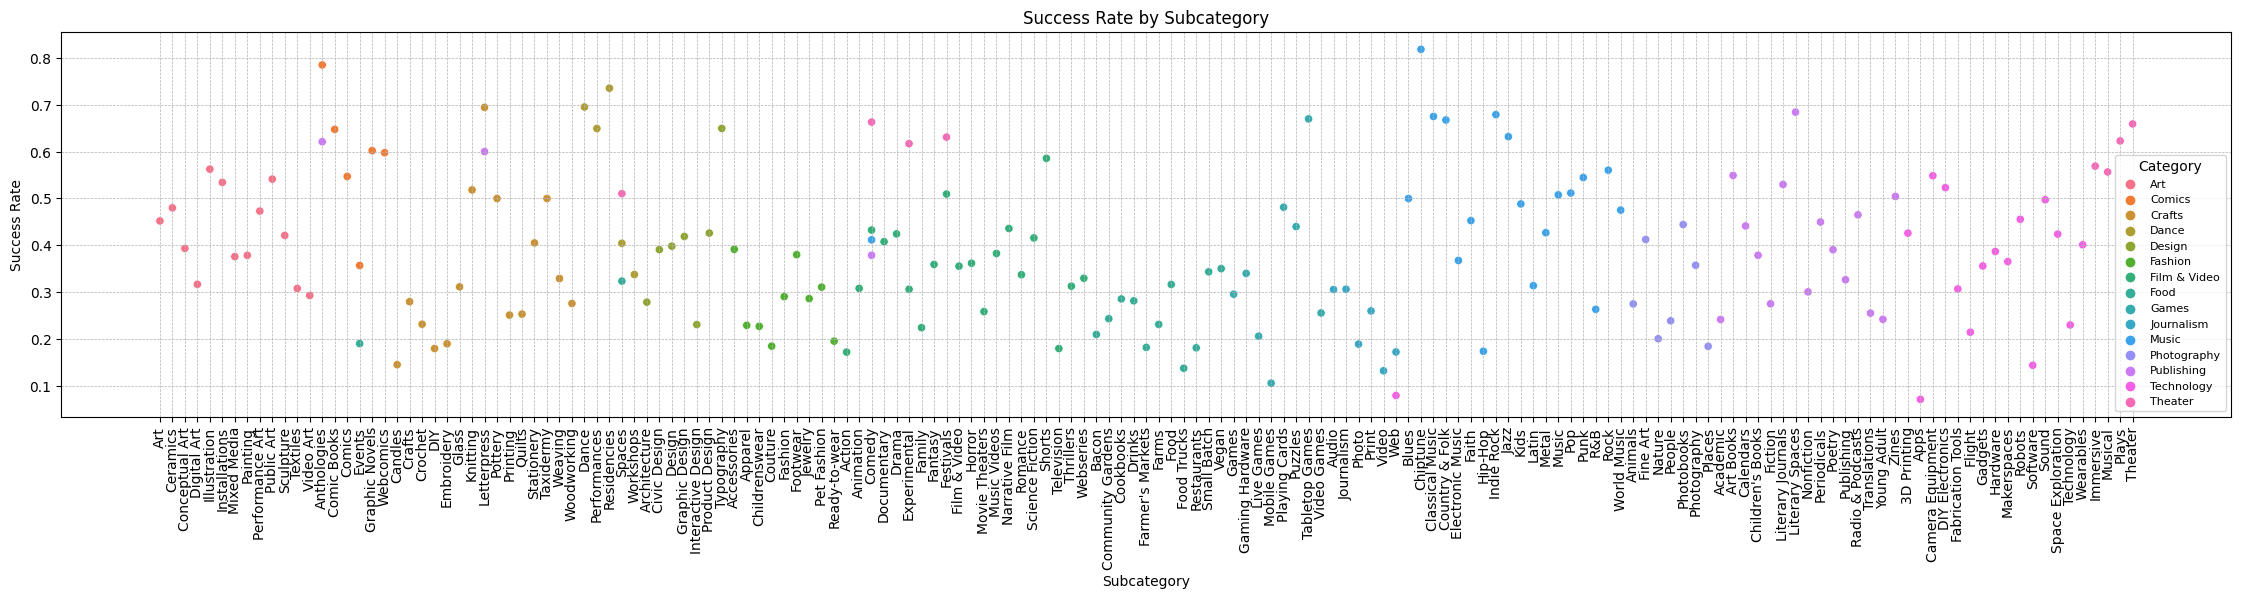

In [ ]:
# plot success rate by Subcategory scatterplot
plt.figure(figsize=(28, 5))
sns.scatterplot(data=df_Category_Successful, x='Subcategory', y='SuccessRate', hue='Category')
plt.title('Success Rate by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Success Rate')
plt.xticks(rotation=90)
plt.legend(title='Category')
plt.legend(title='Category', title_fontsize=10, fontsize=8)  # Adjust legend font sizes
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
# plot success rate by Category scatterplo



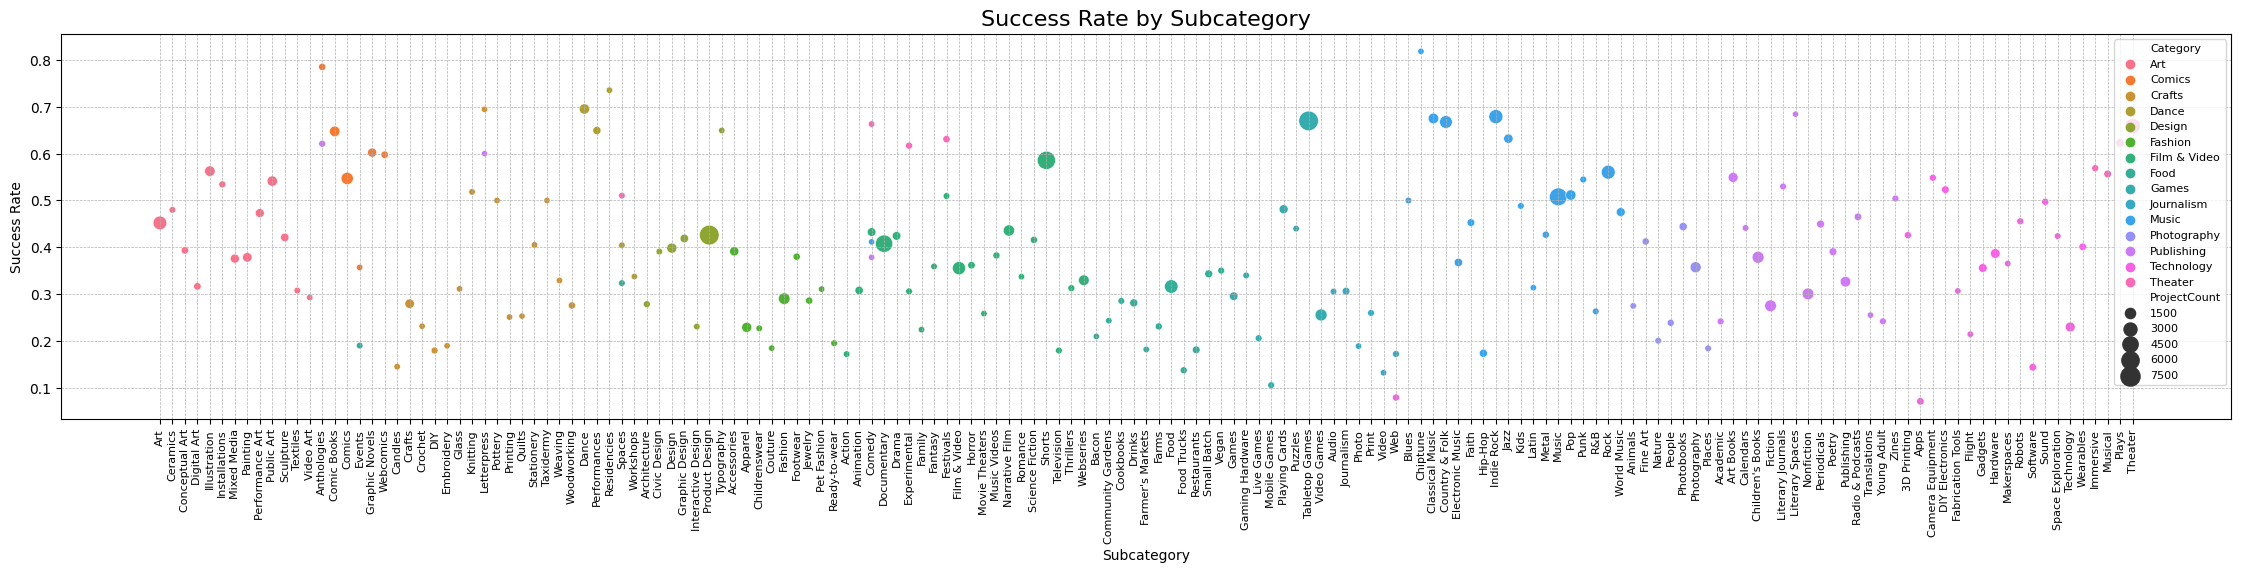

In [ ]:
# Plot success rate by Subcategory scatterplot with dot size reflecting ProjectCount
plt.figure(figsize=(28, 5))
sns.scatterplot(
    data=df_Category_Successful, 
    x='Subcategory', 
    y='SuccessRate', 
    hue='Category', 
    size='ProjectCount',  # Use ProjectCount to determine dot size
    sizes=(20, 200)  # Scale dot sizes (min size, max size)
)
plt.title('Success Rate by Subcategory', fontsize=16)
plt.xlabel('Subcategory')
plt.ylabel('Success Rate')
plt.xticks(rotation=90, fontsize=8)
plt.legend(title_fontsize=8, fontsize=8)  # Adjust legend font sizes
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

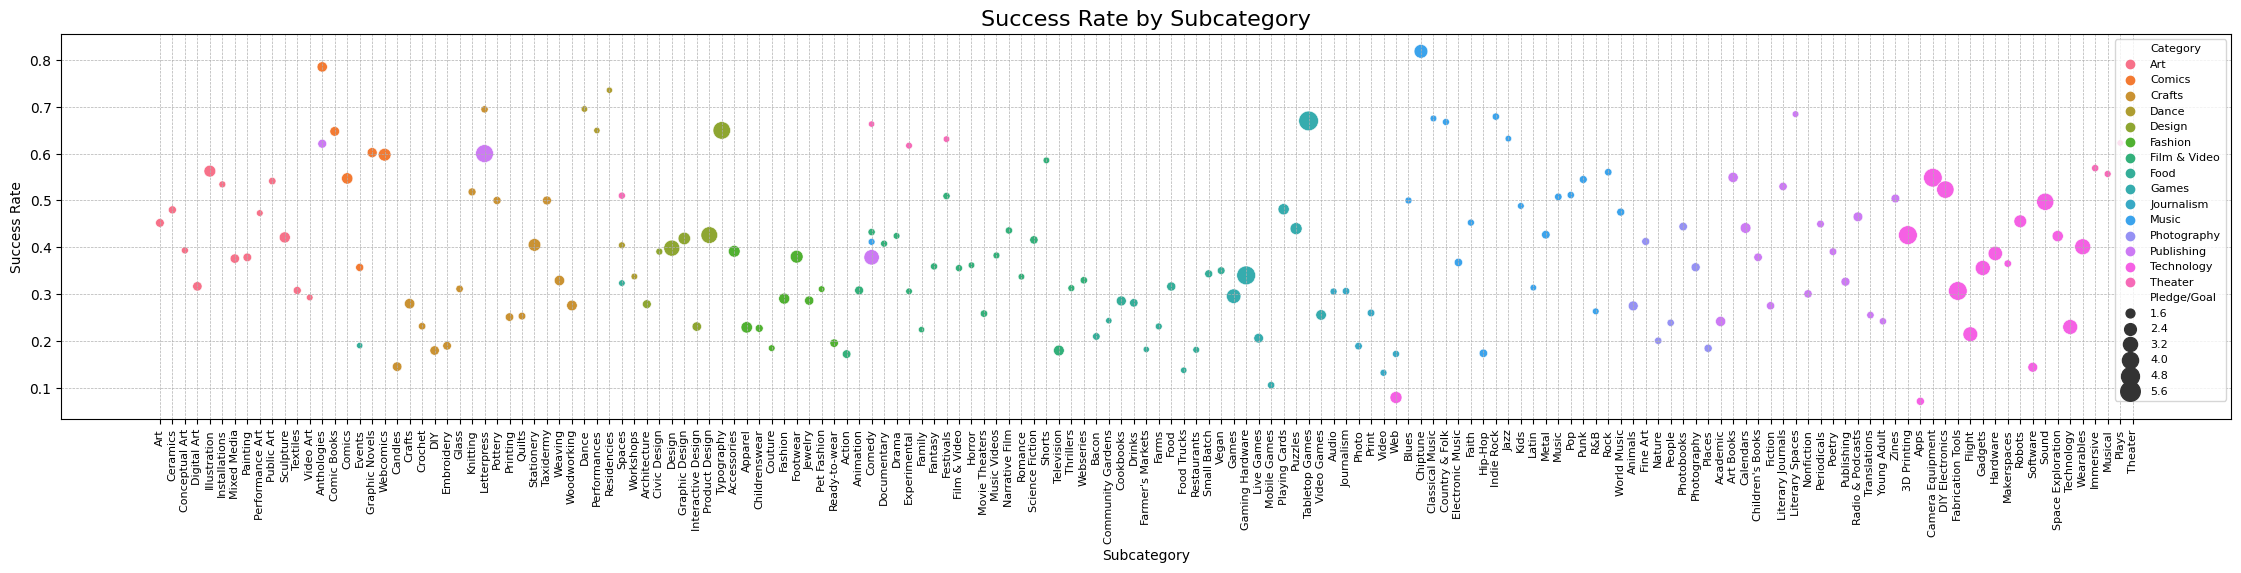

In [ ]:
# Plot success rate by Subcategory scatterplot with dot size reflecting Pledge/Goal ratio
plt.figure(figsize=(28, 5))
sns.scatterplot(
    data=df_Category_Successful, 
    x='Subcategory', 
    y='SuccessRate', 
    hue='Category', 
    size='Pledge/Goal',  # Use Pledge/Goal to determine dot size
    sizes=(20, 200)  # Scale dot sizes (min size, max size)
)
plt.title('Success Rate by Subcategory', fontsize=16)
plt.xlabel('Subcategory')
plt.ylabel('Success Rate')
plt.xticks(rotation=90, fontsize=8)
plt.legend(title_fontsize=8, fontsize=8)  # Adjust legend font sizes
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

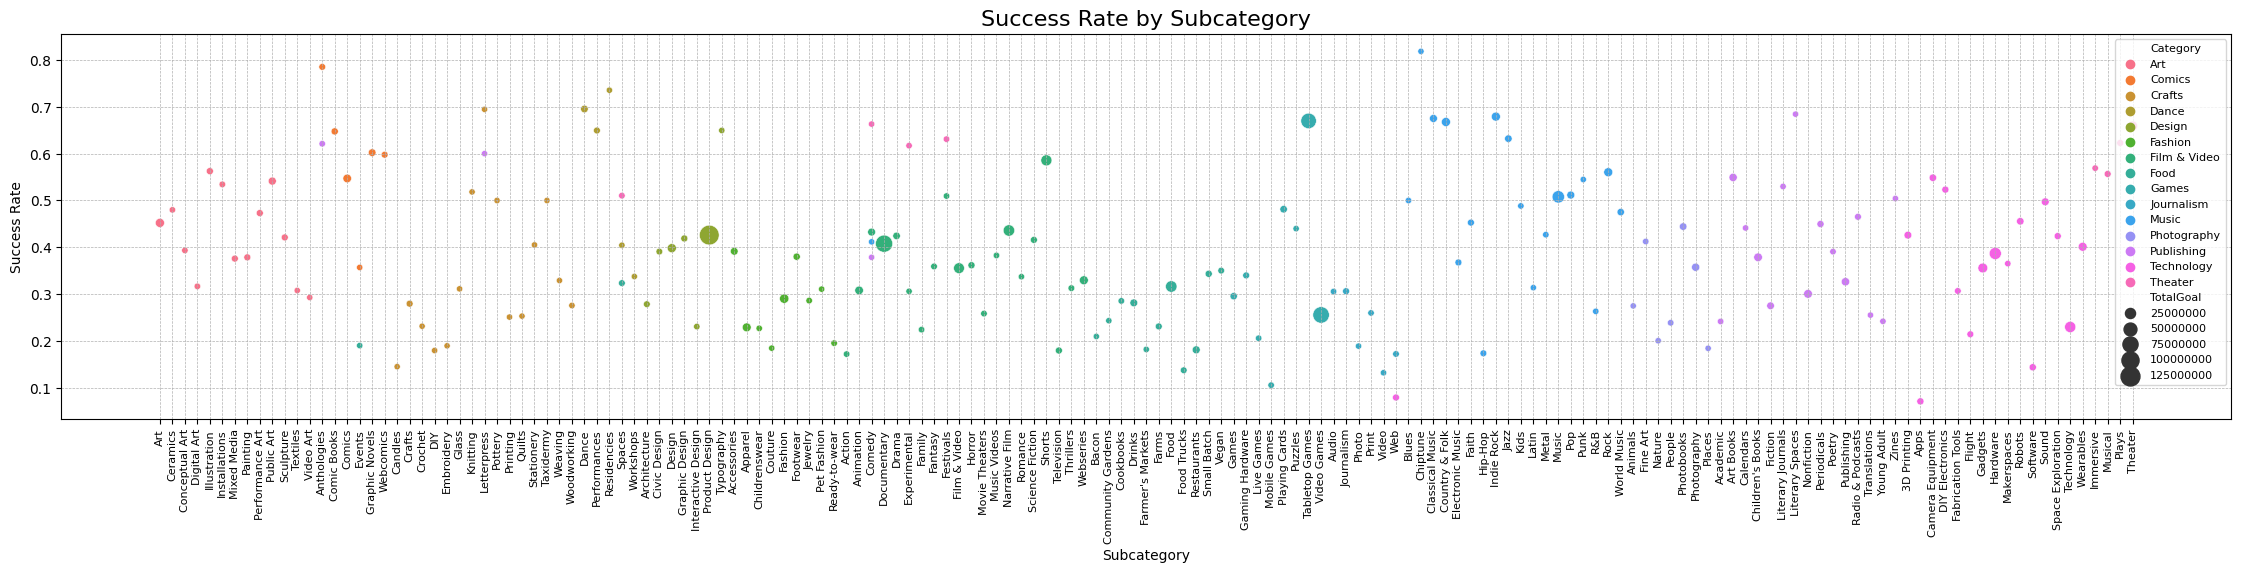

In [ ]:
# Plot success rate by Subcategory scatterplot with dot size reflecting TotalGoal 
plt.figure(figsize=(28, 5))
sns.scatterplot(
    data=df_Category_Successful, 
    x='Subcategory', 
    y='SuccessRate', 
    hue='Category', 
    size='TotalGoal',  # Use Pledge/Goal to determine dot size
    sizes=(20, 200)  # Scale dot sizes (min size, max size)
)
plt.title('Success Rate by Subcategory', fontsize=16)
plt.xlabel('Subcategory')
plt.ylabel('Success Rate')
plt.xticks(rotation=90, fontsize=8)
plt.legend(title_fontsize=8, fontsize=8)  # Adjust legend font sizes
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

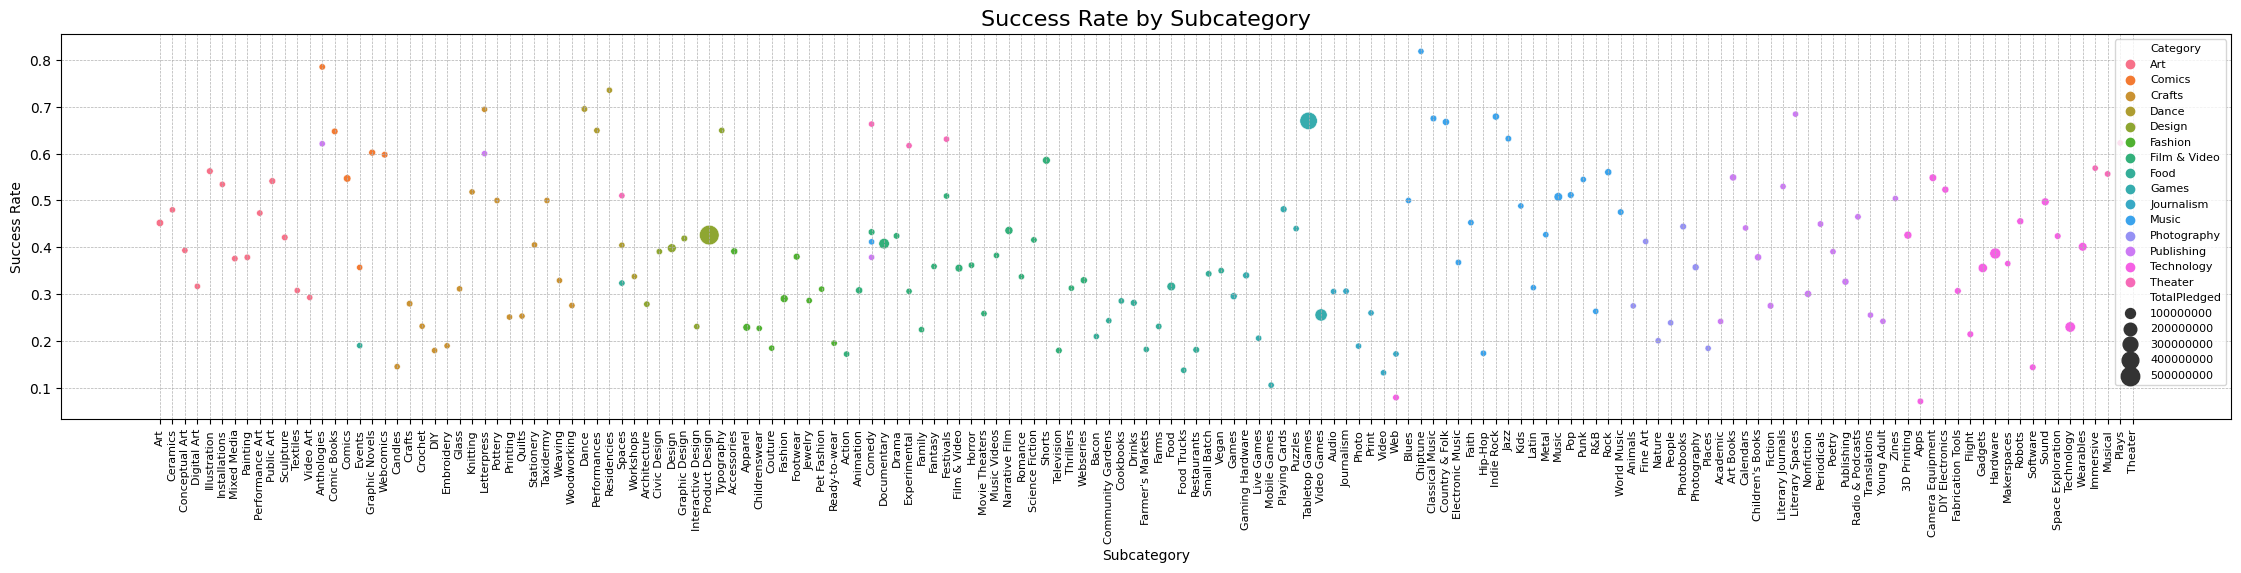

In [ ]:
# Plot success rate by Subcategory scatterplot with dot size reflecting TotalPledged
plt.figure(figsize=(28, 5))
sns.scatterplot(
    data=df_Category_Successful, 
    x='Subcategory', 
    y='SuccessRate', 
    hue='Category', 
    size='TotalPledged',  # Use Pledge/Goal to determine dot size
    sizes=(20, 200)  # Scale dot sizes (min size, max size)
)
plt.title('Success Rate by Subcategory', fontsize=16)
plt.xlabel('Subcategory')
plt.ylabel('Success Rate')
plt.xticks(rotation=90, fontsize=8)
plt.legend(title_fontsize=8, fontsize=8)  # Adjust legend font sizes
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
# sql 
# By Country, Category and Subcategory
sql = """
SELECT Country, Category, Subcategory, State, COUNT(ID) AS ProjectCount, 
       SUM(Goal) AS TotalGoal, SUM(Pledged) AS TotalPledged, 
       SUM(Backers) AS TotalBackers
FROM kickstarter_projects 
WHERE State = 'Successful' 
OR State = 'Failed'
GROUP BY Country, Category, Subcategory, State
ORDER BY Country, Category, Subcategory, State
"""
# create engine
engine = create_engine('sqlite:///../data/kickstarter.db')
# create connection
connection = engine.connect()
# execute sql statement
result = connection.execute(text(sql))
# fetch all results
results = result.fetchall()
# convert to pandas dataframe
df_Country = pd.DataFrame(results, columns=result.keys())
# close connection
connection.close()
# print top 10 rows
df_Country.head(10)

Country Category     Subcategory       State  ProjectCount  TotalGoal   
0  Australia      Art             Art      Failed            75     547688  \
1  Australia      Art             Art  Successful            49     184874   
2  Australia      Art        Ceramics      Failed             2      13353   
3  Australia      Art  Conceptual Art      Failed            10   28208295   
4  Australia      Art  Conceptual Art  Successful             3        722   
5  Australia      Art     Digital Art      Failed            14     115563   
6  Australia      Art     Digital Art  Successful            10      17173   
7  Australia      Art    Illustration      Failed            31     156175   
8  Australia      Art    Illustration  Successful            26      35636   
9  Australia      Art   Installations      Failed             7     209328   

   TotalPledged  TotalBackers  
0         18143           386  
1        262809          3354  
2           880            15  
3          8547            46  
4          1091            40  
5          4260            98  
6         25435           426  
7         15127           281  
8         79172          2352  
9           886            18

In [ ]:
df_Country.shape

(4620, 8)

In [ ]:
# MODELING I 
# RANDOM FOREST 



In [27]:
# import kickstarter_projects.csv 
df = pd.read_csv('../data/kickstarter_projects.csv')
df = df[df['State'].isin(['Successful', 'Failed'])]
df.shape

(331462, 11)

In [28]:
# clean raws with empmissing values or 0 values
df = df.dropna(subset=['Goal', 'Pledged', 'Backers'])
df = df[df['Goal'] > 0]
df = df[df['Pledged'] > 0]
df = df[df['Backers'] > 0]

df = df.dropna(subset=['Country', 'Category', 'Subcategory'])
df = df.dropna(subset=['Launched', 'Deadline'])

# handle dates

# Convert 'Launched' and 'Deadline' columns to datetime format
df['Launched'] = pd.to_datetime(df['Launched'], format='%Y-%m-%d %H:%M:%S')
df['Deadline'] = pd.to_datetime(df['Deadline'], format='%Y-%m-%d')

# Create new feature 'Days' (duration between Deadline and Launched)
df['Duration'] = (df['Deadline'] - df['Launched']).dt.days


# Extract features from 'Launched' column
df['LaunchYear'] = df['Launched'].dt.year
df['LaunchMonth'] = df['Launched'].dt.month

# Extract features from 'Deadline' column
df['DeadlineYear'] = df['Deadline'].dt.year
df['DeadlineMonth'] = df['Deadline'].dt.month
df.shape
df.head(2)

ID                                               Name   
0  1860890148  Grace Jones Does Not Give A F$#% T-Shirt (limi...  \
1   709707365                     CRYSTAL ANTLERS UNTITLED MOVIE   

       Category Subcategory        Country            Launched   Deadline   
0       Fashion     Fashion  United States 2009-04-21 21:02:48 2009-05-31  \
1  Film & Video      Shorts  United States 2009-04-23 00:07:53 2009-07-20   

    Goal  Pledged  Backers   State  Duration  LaunchYear  LaunchMonth   
0   1000      625       30  Failed        39        2009            4  \
1  80000       22        3  Failed        87        2009            4   

   DeadlineYear  DeadlineMonth  
0          2009              5  
1          2009              7

In [ ]:
print(df.isnull().sum())

ID               0
Name             0
Category         0
Subcategory      0
Country          0
Launched         0
Deadline         0
Goal             0
Pledged          0
Backers          0
State            0
Duration         0
LaunchYear       0
LaunchMonth      0
DeadlineYear     0
DeadlineMonth    0
dtype: int64


In [29]:
# encode categorical variables
df['Country'] = df['Country'].astype('category').cat.codes
df['Category'] = df['Category'].astype('category').cat.codes
df['Subcategory'] = df['Subcategory'].astype('category').cat.codes
df['State'] = df['State'].astype('category').cat.codes

In [ ]:
# create new feature 'Pledge/Goal'
df['Pledge/Goal'] = df['Pledged'] / df['Goal']
# create new feature 'Pledge/Backers'
df['Pledge/Backers'] = df['Pledged'] / df['Backers']
df.head(1)

ID                                               Name  Category   
0  1860890148  Grace Jones Does Not Give A F$#% T-Shirt (limi...         5  \

   Subcategory  Country            Launched   Deadline  Goal  Pledged   
0           52       21 2009-04-21 21:02:48 2009-05-31  1000      625  \

   Backers  State  Duration  LaunchYear  LaunchMonth  DeadlineYear   
0       30      0        39        2009            4          2009  \

   DeadlineMonth  Pledge/Goal  Pledge/Backers  
0              5        0.625       20.833333

In [30]:
# Drop original datetime columns
df = df.drop(columns=['Launched', 'Deadline'])

In [31]:
# drop columns
df = df.drop(['ID', 'Name'], axis=1)
df.head(1)

Category  Subcategory  Country  Goal  Pledged  Backers  State  Duration   
0         5           52       21  1000      625       30      0        39  \

   LaunchYear  LaunchMonth  DeadlineYear  DeadlineMonth  
0        2009            4          2009              5

In [ ]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop(columns=['State'])  # Features
y = df['State']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the model using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9999487739908476
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31716
           1       1.00      1.00      1.00     26848

    accuracy                           1.00     58564
   macro avg       1.00      1.00      1.00     58564
weighted avg       1.00      1.00      1.00     58564



In [ ]:
# da of course I should drop the pledged amount
df = df.drop(columns=['Pledged', 'Pledge/Goal', 'Pledge/Backers'])
df.head(1)

Category  Subcategory  Country  Goal  Backers  State  Duration  LaunchYear   
0         5           52       21  1000       30      0        39        2009  \

   LaunchMonth  DeadlineYear  DeadlineMonth  
0            4          2009              5

In [ ]:
# da of course I should remove the pledge amount from test data
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop(columns=['State'])  # Features
y = df['State']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the model using Random Forest Classifier to predict the state
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9218974113790042
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     31716
           1       0.91      0.92      0.92     26848

    accuracy                           0.92     58564
   macro avg       0.92      0.92      0.92     58564
weighted avg       0.92      0.92      0.92     58564



In [35]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [36]:
#split the data into training and testing sets
X = df.drop(columns=['Pledged'])  # Features
y = df['Pledged']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Initialize the model
model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
# Make predictions
y_pred = model.predict(X_test)

In [39]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 2329510632.129331
R² Score: 0.7395132783315431


In [ ]:
# Evaluate the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
